In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Sex', ylabel='count'>

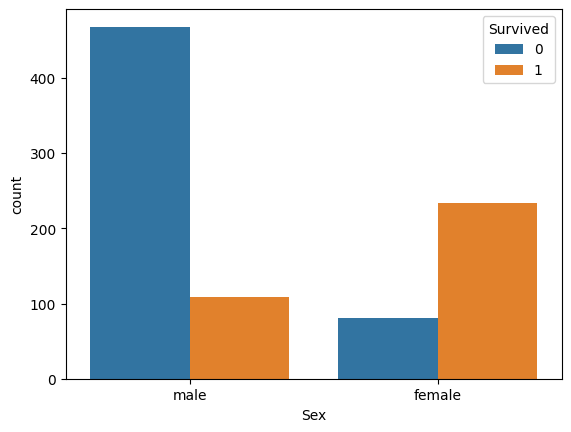

In [7]:
sns.countplot(data=data,x='Sex',hue='Survived')

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [13]:
data['Cabin']=data['Cabin'].ffill()

In [15]:
data.dropna(inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,C123,Q


In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data['Pclass'].unique()

array([1, 3, 2], dtype=int64)

<Axes: xlabel='Fare', ylabel='Count'>

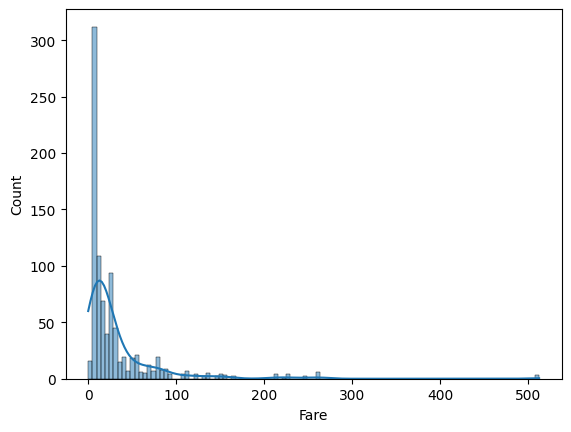

In [23]:
sns.histplot(data=data,x='Fare',kde=True)

<Axes: xlabel='Fare', ylabel='Density'>

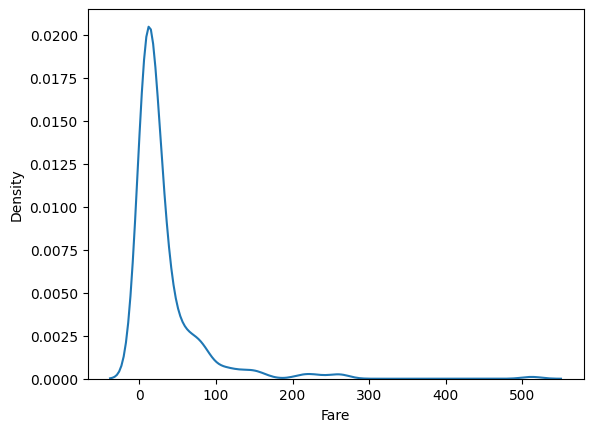

In [25]:
sns.kdeplot(data=data,x='Fare')

In [31]:
data['Fare']=np.log(data['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

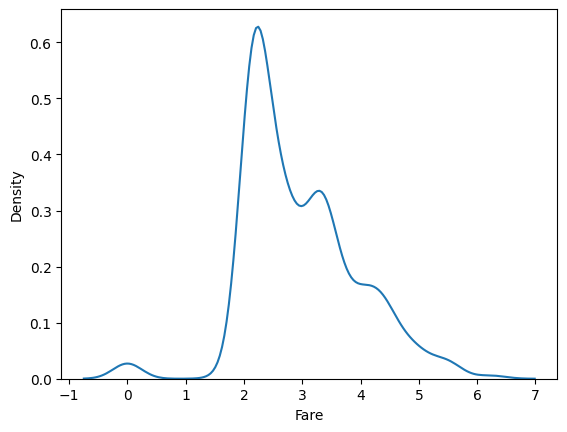

In [33]:
sns.kdeplot(data=data,x='Fare')

<Axes: xlabel='Age', ylabel='Count'>

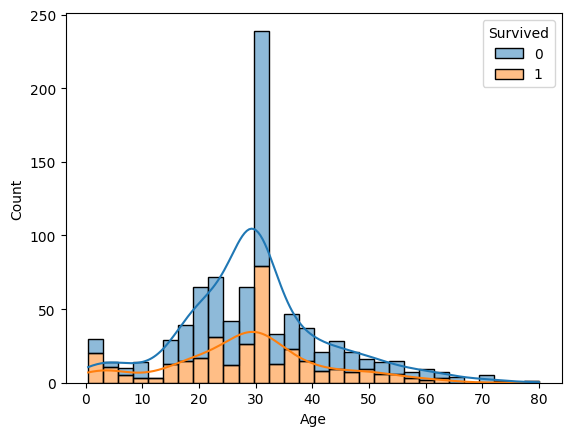

In [27]:
sns.histplot(data=data,x='Age',hue='Survived',multiple='stack',kde=True)

In [57]:
age_survived=data[['Age','Survived']]

In [59]:
age_survived.head()

,Age,Survived
1,38.000000,1
2,26.000000,1
3,35.000000,1
4,35.000000,0
5,29.699118,0


In [61]:
bins=[0,10,20,30,40,50,60,100]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+']
age_survived['Age_Group']=pd.cut(data['Age'],bins=bins,labels=labels)
age_survived.head()

C:\Users\abhin\AppData\Local\Temp\ipykernel_96484\1485739473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_survived['Age_Group']=pd.cut(data['Age'],bins=bins,labels=labels)


,Age,Survived,Age_Group
1,38.000000,1,30-40
2,26.000000,1,20-30
3,35.000000,1,30-40
4,35.000000,0,30-40
5,29.699118,0,20-30


<Axes: xlabel='Age_Group', ylabel='count'>

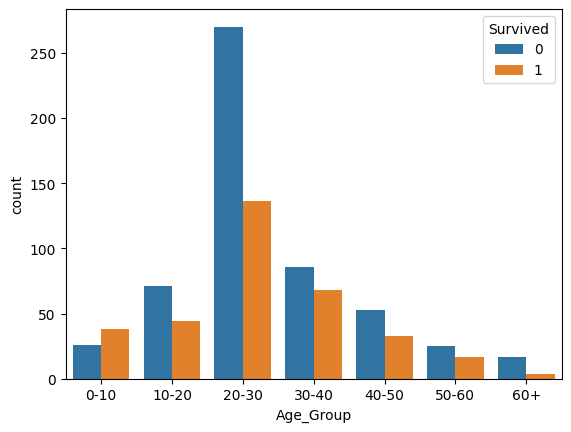

In [65]:
sns.countplot(data=age_survived,x='Age_Group',hue='Survived')

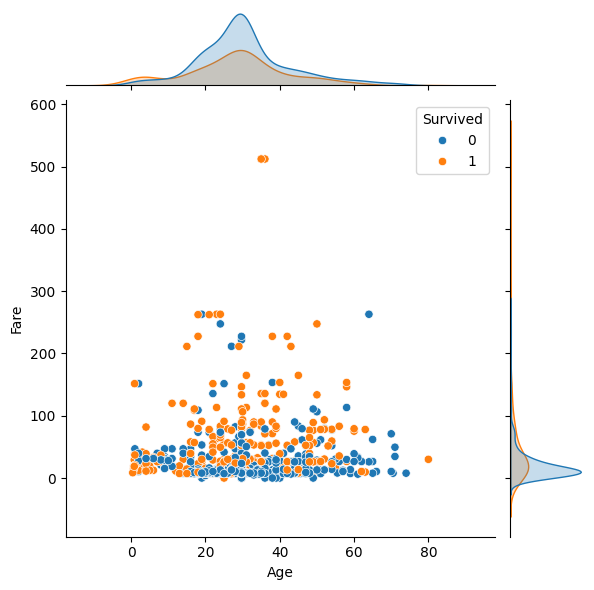

In [83]:
sns.jointplot(data=data,x='Age',y='Fare',hue='Survived',kind='scatter')

In [35]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |    

True